🌱 AI-DRIVEN IOT SMART AGRICULTURE SYSTEM

1. IOT SENSOR NETWORK

SOIL SENSORS:
  • soil_moisture: Measures water content in soil
  • soil_temperature: Monitors soil temperature at different depths
  • soil_ph: Measures acidity/alkalinity levels
  • npk_sensor: Measures Nitrogen, Phosphorus, Potassium levels

ENVIRONMENTAL SENSORS:
  • air_temperature: Ambient temperature monitoring
  • air_humidity: Relative humidity levels
  • light_intensity: Solar radiation/PAR measurement
  • rain_gauge: Precipitation measurement
  • wind_speed: Wind velocity monitoring

CROP HEALTH SENSORS:
  • multispectral_camera: NDVI and plant health imaging
  • hyperspectral_imager: Detailed plant stress analysis
  • thermal_camera: Canopy temperature for water stress

IRRIGATION SENSORS:
  • water_flow: Irrigation water consumption
  • pressure_sensors: Irrigation system pressure

2. DATA GENERATION AND AI MODEL TRAINING
✅ Crop Yield Prediction Model Trained
📊 Mean Absolute Error: 9.02 kg/ha
📈 R² Score: 0.56

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/tmp/ipython-input-3103991552.py:224: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(nutrient_data, labels=nutrients)


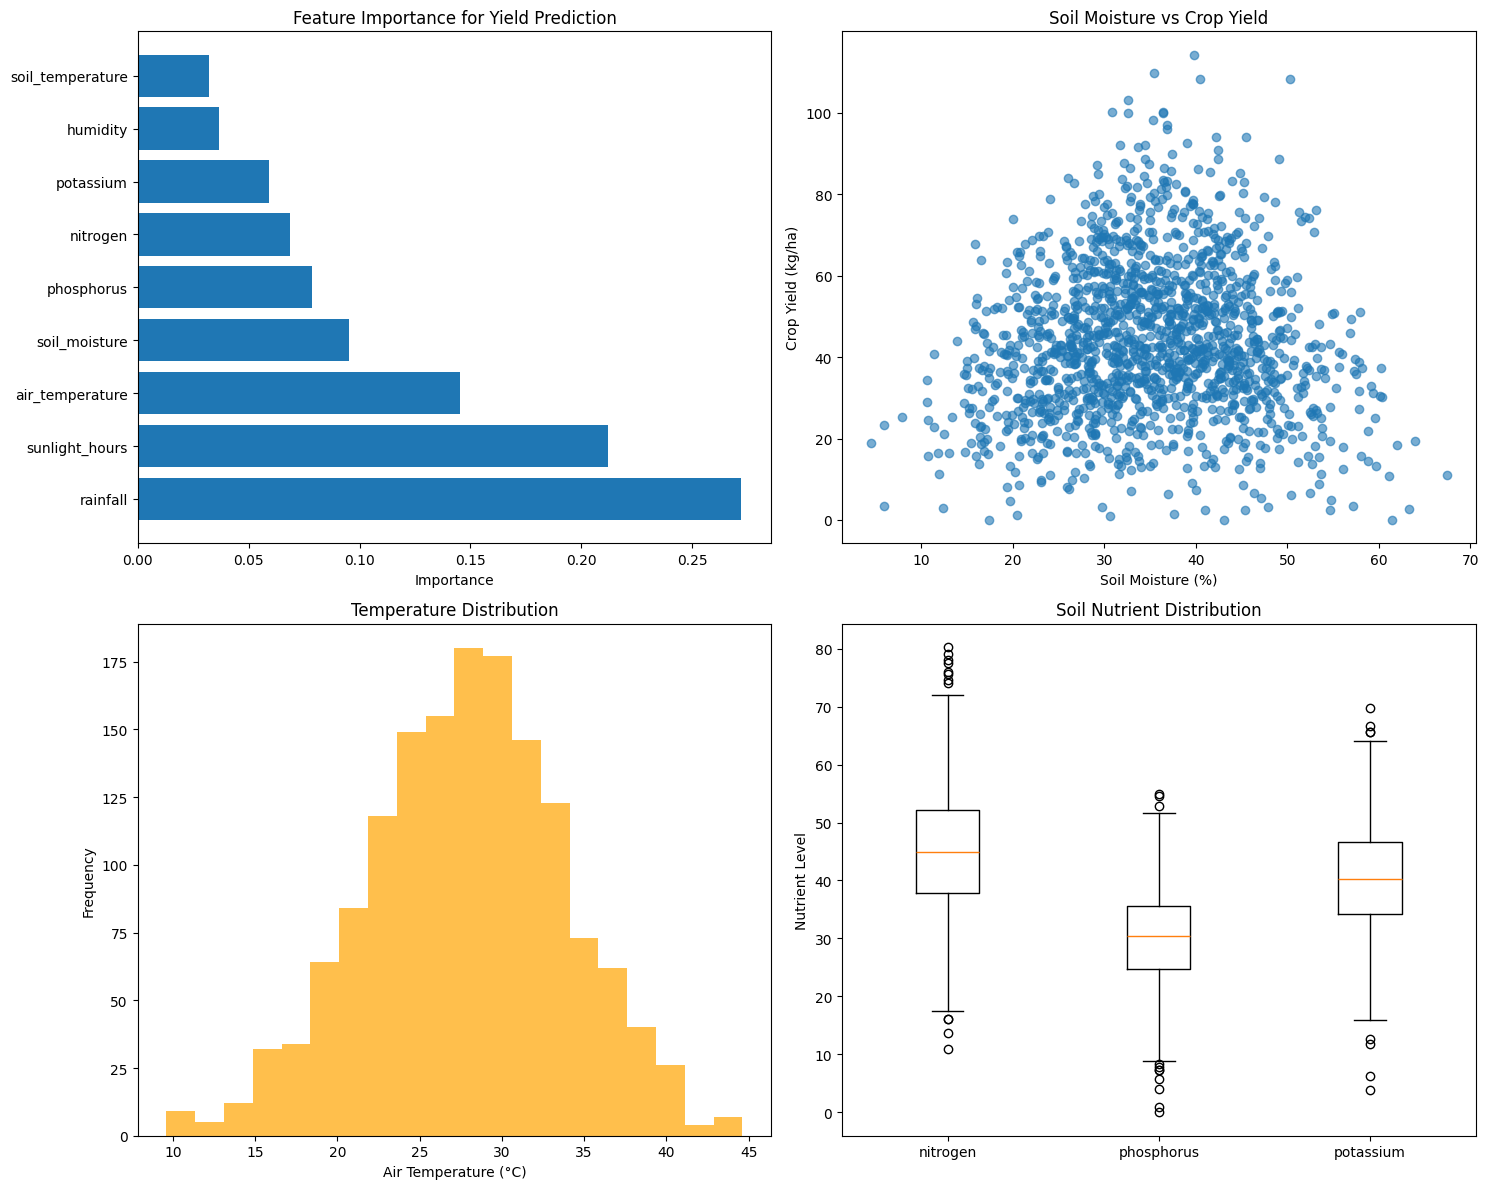

✅ Visualizations saved as 'agriculture_analysis.png'

🚀 SMART AGRICULTURE BENEFITS
✅ 20-30% Water Savings: Precision irrigation
✅ 15-25% Yield Increase: Optimal growing conditions
✅ 30% Labor Reduction: Automated monitoring
✅ Early Disease Detection: Computer vision alerts
✅ Data-Driven Decisions: AI-powered insights
✅ Sustainable Farming: Reduced chemical usage


In [1]:
"""
AI-Driven IoT Smart Agriculture System
Concept Design for Crop Monitoring and Yield Prediction
"""

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json

class SmartAgricultureIoT:
    """
    AI-powered IoT system for smart agriculture monitoring and prediction
    """

    def __init__(self):
        self.sensors = self.define_sensors()
        self.crop_data = None
        self.yield_model = None
        self.feature_importance = None

    def define_sensors(self):
        """Define IoT sensors required for smart agriculture"""

        sensors = {
            'soil_sensors': {
                'soil_moisture': 'Measures water content in soil',
                'soil_temperature': 'Monitors soil temperature at different depths',
                'soil_ph': 'Measures acidity/alkalinity levels',
                'npk_sensor': 'Measures Nitrogen, Phosphorus, Potassium levels'
            },
            'environmental_sensors': {
                'air_temperature': 'Ambient temperature monitoring',
                'air_humidity': 'Relative humidity levels',
                'light_intensity': 'Solar radiation/PAR measurement',
                'rain_gauge': 'Precipitation measurement',
                'wind_speed': 'Wind velocity monitoring'
            },
            'crop_health_sensors': {
                'multispectral_camera': 'NDVI and plant health imaging',
                'hyperspectral_imager': 'Detailed plant stress analysis',
                'thermal_camera': 'Canopy temperature for water stress'
            },
            'irrigation_sensors': {
                'water_flow': 'Irrigation water consumption',
                'pressure_sensors': 'Irrigation system pressure'
            }
        }

        return sensors

    def generate_sample_data(self, num_samples=1000):
        """Generate synthetic agricultural data for demonstration"""

        np.random.seed(42)

        data = []
        for i in range(num_samples):
            # Base conditions
            soil_moisture = np.random.normal(35, 10)
            soil_temp = np.random.normal(25, 5)
            air_temp = np.random.normal(28, 6)
            humidity = np.random.normal(65, 15)
            nitrogen = np.random.normal(45, 10)
            phosphorus = np.random.normal(30, 8)
            potassium = np.random.normal(40, 9)
            sunlight_hours = np.random.normal(8, 2)
            rainfall = np.random.exponential(5)

            # Calculate yield based on conditions (simplified model)
            base_yield = 100  # kg per hectare

            # Yield factors
            moisture_factor = max(0, 1 - abs(soil_moisture - 35) / 50)
            temp_factor = max(0, 1 - abs(air_temp - 28) / 30)
            nutrient_factor = (nitrogen/50 * 0.4 + phosphorus/30 * 0.3 + potassium/40 * 0.3)
            weather_factor = (sunlight_hours/10 * 0.6 + min(rainfall/10, 1) * 0.4)

            # Add some noise and calculate final yield
            noise = np.random.normal(0, 10)
            crop_yield = base_yield * moisture_factor * temp_factor * nutrient_factor * weather_factor + noise
            crop_yield = max(0, crop_yield)  # Ensure non-negative

            data.append({
                'soil_moisture': soil_moisture,
                'soil_temperature': soil_temp,
                'air_temperature': air_temp,
                'humidity': humidity,
                'nitrogen': nitrogen,
                'phosphorus': phosphorus,
                'potassium': potassium,
                'sunlight_hours': sunlight_hours,
                'rainfall': rainfall,
                'crop_yield': crop_yield,
                'field_id': f"field_{i % 10}",
                'date': datetime.now() - timedelta(days=np.random.randint(0, 365))
            })

        self.crop_data = pd.DataFrame(data)
        return self.crop_data

    def train_yield_prediction_model(self):
        """Train AI model for crop yield prediction"""

        if self.crop_data is None:
            self.generate_sample_data()

        # Prepare features and target
        feature_columns = ['soil_moisture', 'soil_temperature', 'air_temperature',
                          'humidity', 'nitrogen', 'phosphorus', 'potassium',
                          'sunlight_hours', 'rainfall']

        X = self.crop_data[feature_columns]
        y = self.crop_data['crop_yield']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest model
        self.yield_model = RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )

        self.yield_model.fit(X_train, y_train)

        # Evaluate model
        y_pred = self.yield_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Feature importance
        self.feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': self.yield_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("✅ Crop Yield Prediction Model Trained")
        print(f"📊 Mean Absolute Error: {mae:.2f} kg/ha")
        print(f"📈 R² Score: {r2:.3f}")

        return mae, r2

    def predict_yield(self, sensor_readings):
        """Predict crop yield based on current sensor readings"""

        if self.yield_model is None:
            self.train_yield_prediction_model()

        # Convert sensor readings to feature array
        feature_columns = ['soil_moisture', 'soil_temperature', 'air_temperature',
                          'humidity', 'nitrogen', 'phosphorus', 'potassium',
                          'sunlight_hours', 'rainfall']

        # Ensure all features are present
        features = np.array([[sensor_readings.get(col, 0) for col in feature_columns]])

        prediction = self.yield_model.predict(features)[0]

        return max(0, prediction)  # Ensure non-negative

    def generate_irrigation_recommendation(self, sensor_data):
        """Generate AI-powered irrigation recommendations"""

        moisture = sensor_data.get('soil_moisture', 0)
        temp = sensor_data.get('air_temperature', 0)
        humidity = sensor_data.get('humidity', 0)

        # Simple rule-based system (in practice, this would be more sophisticated)
        if moisture < 25:
            recommendation = "CRITICAL: Immediate irrigation required"
            action = "start_irrigation"
            duration = 60  # minutes
        elif moisture < 35:
            recommendation = "Moderate irrigation recommended"
            action = "start_irrigation"
            duration = 30
        else:
            recommendation = "Sufficient moisture, no irrigation needed"
            action = "no_action"
            duration = 0

        return {
            'recommendation': recommendation,
            'action': action,
            'duration_minutes': duration,
            'timestamp': datetime.now().isoformat()
        }

    def visualize_sensor_data(self):
        """Create visualizations of sensor data and predictions"""

        if self.crop_data is None:
            self.generate_sample_data()

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Plot 1: Feature importance
        axes[0, 0].barh(self.feature_importance['feature'], self.feature_importance['importance'])
        axes[0, 0].set_title('Feature Importance for Yield Prediction')
        axes[0, 0].set_xlabel('Importance')

        # Plot 2: Soil moisture vs yield
        axes[0, 1].scatter(self.crop_data['soil_moisture'], self.crop_data['crop_yield'], alpha=0.6)
        axes[0, 1].set_xlabel('Soil Moisture (%)')
        axes[0, 1].set_ylabel('Crop Yield (kg/ha)')
        axes[0, 1].set_title('Soil Moisture vs Crop Yield')

        # Plot 3: Temperature distribution
        axes[1, 0].hist(self.crop_data['air_temperature'], bins=20, alpha=0.7, color='orange')
        axes[1, 0].set_xlabel('Air Temperature (°C)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Temperature Distribution')

        # Plot 4: Nutrient levels
        nutrients = ['nitrogen', 'phosphorus', 'potassium']
        nutrient_data = [self.crop_data[nut] for nut in nutrients]
        axes[1, 1].boxplot(nutrient_data, labels=nutrients)
        axes[1, 1].set_ylabel('Nutrient Level')
        axes[1, 1].set_title('Soil Nutrient Distribution')

        plt.tight_layout()
        plt.savefig('agriculture_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

    def create_data_flow_diagram(self):
        """Generate description of AI-IoT data flow diagram"""

        diagram = """
        SMART AGRICULTURE AI-IoT DATA FLOW DIAGRAM
        ==========================================

        [IoT Sensor Layer]
        │
        ├── Soil Sensors → Moisture, Temp, pH, NPK
        ├── Environmental Sensors → Air Temp, Humidity, Light, Rain, Wind
        ├── Crop Health Sensors → Multispectral, Thermal cameras
        └── Irrigation Sensors → Flow, Pressure
        │
        ▼

        [Edge AI Processing Layer]
        │
        ├── Data Preprocessing & Cleaning
        ├── Real-time Anomaly Detection
        ├── Local Decision Making (Immediate actions)
        └── Data Compression for Transmission
        │
        ▼

        [Cloud AI Analytics Layer]
        │
        ├── Yield Prediction Model (Random Forest)
        ├── Disease Detection (Computer Vision)
        ├── Irrigation Optimization
        ├── Historical Trend Analysis
        └── Weather Integration & Forecasting
        │
        ▼

        [Decision & Action Layer]
        │
        ├── Automated Irrigation Control
        ├── Fertilizer Application Recommendations
        ├── Pest/Disease Alerts to Farmers
        ├── Yield Forecasting Reports
        └── Mobile App Notifications
        │
        ▼

        [Farmer Interface]
        │
        └── Dashboard with Real-time Insights
            - Current field conditions
            - Yield predictions
            - Actionable recommendations
            - Historical performance

        KEY AI COMPONENTS:
        • Predictive Analytics for yield forecasting
        • Computer Vision for plant health monitoring
        • Anomaly Detection for early problem identification
        • Optimization Algorithms for resource allocation
        """

        return diagram

def demonstrate_smart_agriculture():
    """Main demonstration function for smart agriculture system"""

    print("="*60)
    print("🌱 AI-DRIVEN IOT SMART AGRICULTURE SYSTEM")
    print("="*60)

    # Initialize system
    agri_system = SmartAgricultureIoT()

    # Display sensor information
    print("\n1. IOT SENSOR NETWORK")
    print("="*30)
    for category, sensors in agri_system.sensors.items():
        print(f"\n{category.upper().replace('_', ' ')}:")
        for sensor, description in sensors.items():
            print(f"  • {sensor}: {description}")

    # Generate and analyze data
    print("\n2. DATA GENERATION AND AI MODEL TRAINING")
    print("="*40)
    agri_system.generate_sample_data(1500)
    mae, r2 = agri_system.train_yield_prediction_model()

    print("\n3. FEATURE IMPORTANCE ANALYSIS")
    print("="*35)
    print(agri_system.feature_importance.to_string(index=False))

    # Demonstrate real-time prediction
    print("\n4. REAL-TIME PREDICTION DEMONSTRATION")
    print("="*40)

    sample_sensor_data = {
        'soil_moisture': 32.5,
        'soil_temperature': 24.8,
        'air_temperature': 29.3,
        'humidity': 68.2,
        'nitrogen': 48.7,
        'phosphorus': 31.2,
        'potassium': 42.8,
        'sunlight_hours': 7.8,
        'rainfall': 3.2
    }

    predicted_yield = agri_system.predict_yield(sample_sensor_data)
    irrigation_rec = agri_system.generate_irrigation_recommendation(sample_sensor_data)

    print("📊 Current Sensor Readings:")
    for key, value in sample_sensor_data.items():
        print(f"   {key}: {value}")

    print(f"\n🎯 AI Yield Prediction: {predicted_yield:.1f} kg/ha")
    print(f"💧 Irrigation Recommendation: {irrigation_rec['recommendation']}")

    # Display data flow
    print("\n5. AI-IoT DATA FLOW ARCHITECTURE")
    print("="*40)
    print(agri_system.create_data_flow_diagram())

    # Generate visualizations
    print("\n6. DATA VISUALIZATIONS")
    print("="*25)
    agri_system.visualize_sensor_data()
    print("✅ Visualizations saved as 'agriculture_analysis.png'")

    # Benefits summary
    print("\n" + "="*50)
    print("🚀 SMART AGRICULTURE BENEFITS")
    print("="*50)
    print("✅ 20-30% Water Savings: Precision irrigation")
    print("✅ 15-25% Yield Increase: Optimal growing conditions")
    print("✅ 30% Labor Reduction: Automated monitoring")
    print("✅ Early Disease Detection: Computer vision alerts")
    print("✅ Data-Driven Decisions: AI-powered insights")
    print("✅ Sustainable Farming: Reduced chemical usage")

if __name__ == "__main__":
    demonstrate_smart_agriculture()